# **Table of content**
1. Collecting Data
2. Exploring And Preprocessing Data3. Asking Meaningful Questions And Analyzing
4. Reflection
5. References

### **1. Collecting Data**
#### **1.1. Subject And Source** <br>**Subject:** The data set has been prepared from manual records of road traffic accident of the year 2017-2020. All the sensitive information have been excluded during data encoding and finally it has 32 features and 12316 instances of the accident <br>
**Source:** https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents <br>



#### **1.2. Authors And Copyright** <br>
**Authors:** Saurabh Shahane (Owner) <br>
**Copyright:** Attribution 4.0 International (CC BY 4.0) <br>


#### **1.3. The way authors collect data** <br>
This data set is collected from Addis Ababa Sub city police departments for Masters research work.


### **2. Exploring And Preprocessing Data** <br>
#### **2.1. Import libraries**


In [2]:
# File system manangement
import time, psutil, os

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


#### **2.2. Loading data**

In [3]:
# Loading the data
data = pd.read_csv('./Data/RTA Dataset.csv')


In [16]:
# Printing the top 5 rows
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#### **2.3. How many rows and how many columns?**

In [17]:
# Shape of the data
print("Shape of the data: {}".format(data.shape))

Shape of the data: (12316, 32)


Answer: There are 12316 rows and 32 column

#### **2.4. What is the meaning of each row?**

In [8]:
data.sample(1)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
5090,9:28:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury


Answer: Each row contain information of an accident including 32 features which means 32 informations

#### **2.5. Are there duplicated rows?**

In [18]:
# Count of duplicate rows
duplicate = data[data.duplicated() == True]
print("Number of duplicate rows: {}".format(len(duplicate)))

Number of duplicate rows: 0


Answer: Luckily, we don't have any duplicated rows

#### **2.6. What is the meaning of each column?**

In [19]:
# Column names
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

**The meaning of each column:**
- `Time`: Time when accident is being recorded following the format hh:mm:ss
- `Day_of_week`: The day of the week that the accident happen from Monday to Sunday
- `Age_band_of_driver`: The age band of the driver
- `Sex_of_driver`: Sex of the driver
- `Educational_level`: Educational of the driver
- `Vehicle_driver_relation`: Relationship between the driver and the vehicle
- `Type_of_vehicle`: Type of the vehicle
- `Owner_of_vehicle`: The owner of the vehicle
- `Service_year_of_vehicle`: Service year of the vehicle
- `Defect_of_vehicle`: Defect of a vehicle
- `Area_accident_occured`: The area that the accident occured
- `Lanes_or_Medians`: Lanes or Medians
- `Road_allignment`: The road allignment
- `Types_of_Junction`: Types of Junction
- `Road_surface_type`: The road surface type 
- `Road_surface_conditions`: The condition of the road surface
- `Light_conditions`: The light condition
- `Weather_conditions`: The weather condition
- `Type_of_collision`: Type of collision
- `Number_of_vehicles_involved`: Number of vehicles involved in the accident
- `Number_of_casualties`: Number of casualties
- `Vehicle_movement`: Vehicle movement
- `Casualty_class`: Casualty class
- `Sex_of_casualty`: Sex of casualty
- `Age_band_of_casualty`: Age band of casualty
- `Casualty_severity`: Casulty severity
- `Work_of_casuality`: Work of casuality
- `Fitness_of_casuality`: Fitness of casuality
- `Pedestrian_movement`: The usually typical and predictable flow of pedestrian traffic
- `Cause_of_accident`: The main reason which cause the accident
- `Accident_severity`: The injury level s

#### **2.7. What is the current data type of each column?**

In [20]:
# Column datatypes
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

Number of integer columns: 2
Number of object columns: 30

#### **2.8. Columns having inappropriate data types?**

#### Time 
To examine the distribution of time, we convert the feature from **_hh:mm:ss_**  format to seconds with the mapping <br>
**hh:mm:ss -> (hh * 60 * 60) + (mm * 60) + ss** <br>

In [4]:
# Convertion of time from hh:mm:ss format to seconds
def convert_to_seconds(x):
    h = int(x.split(':')[0])
    m = int(x.split(':')[1])
    s = int(x.split(':')[2])
    return (h*60*60)+(m*60)+s

data['Time'] = data['Time'].apply(convert_to_seconds)

The rest is as seem as we expected.

#### **2.9. Numerical column**

Numerical features:
- `Time`: is a bounded variable. After the convertion, it is strictly bounded between 0 and 86400. It has a minimum value of 60 and a maximum of 86340
- `Number_of_vehicles_involved`: is a count data, taking positive integer values (as there can be no traffic accident without vehicles).
- `Number_of_casualties`: is again a count data, taking positive integer values.

**_What is the percentage of missing values?_**

In [37]:
print ("Percentage of missing values:")
print ("Time: ", data['Time'].isnull().mean() * 100)
print ("Number_of_vehicles_involved: ", data['Number_of_vehicles_involved'].isnull().mean() * 100)
print ("Number_of_casualties: ", data['Number_of_casualties'].isnull().mean() * 100)

Percentage of missing values:
Time:  0.0
Number_of_vehicles_involved:  0.0
Number_of_casualties:  0.0


All the numerical column has no missing values

**_Min? max? Are they abnormal?_**

We will show some statistical description of numerical features
- Min value
- Quantile (25%, 50%, 75%)
- Max value <br>

In [39]:
# Statistical description of numerical features
data.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000,12316.000000
mean,51470.768107,2.040679,1.548149
std,18705.512332,0.688790,1.007179
min,60.000000,1.000000,1.000000
25%,37860.000000,2.000000,1.000000
50%,54600.000000,2.000000,1.000000
75%,65400.000000,2.000000,2.000000
max,86340.000000,7.000000,8.000000


As we can see, there is nothing seem to be unusual. We can say that the data is not abnormal

#### **2.10. Catagorical column**

In [35]:
categorical_cols = data.columns[(data.dtypes == 'object')]
print (categorical_cols)
print ("Number of cagorical columns:", len(categorical_cols))

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
Number of cagorical columns: 29


After the convertion, we have total 29 catagorical columns left.

**_Distribution of the catagorical features_**

In [36]:
# Variables except and 'Time','Number_of_vehicles_involved','Number_of_casualties'
features_others = [x for x in data.columns.tolist() if x not in ['Time','Number_of_vehicles_involved','Number_of_casualties']]

# List of features with horizontal xtickmarks (for others we shall make it vertical for visualization convenience)
features_horiz = ['Sex_of_driver', 'Vehicle_driver_relation', 'Defect_of_vehicle']

<Figure size 400x400 with 0 Axes>

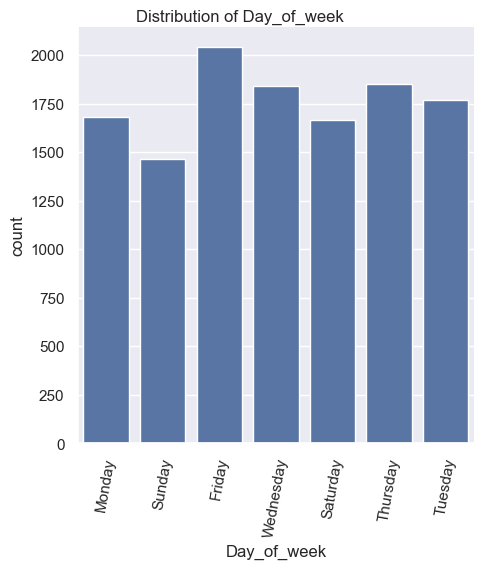

<Figure size 400x400 with 0 Axes>

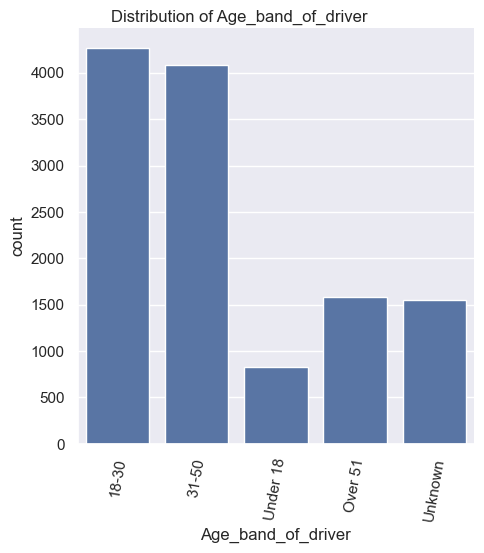

<Figure size 400x400 with 0 Axes>

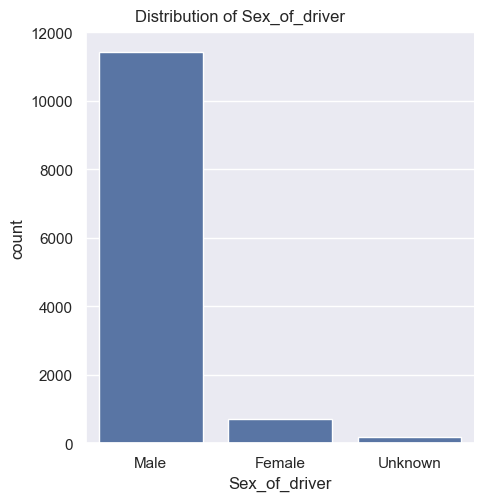

<Figure size 400x400 with 0 Axes>

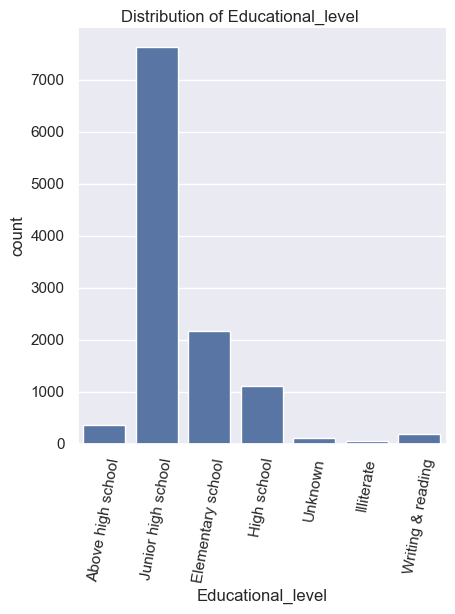

<Figure size 400x400 with 0 Axes>

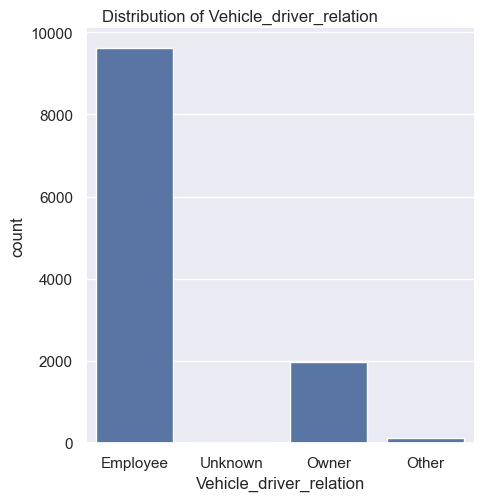

<Figure size 400x400 with 0 Axes>

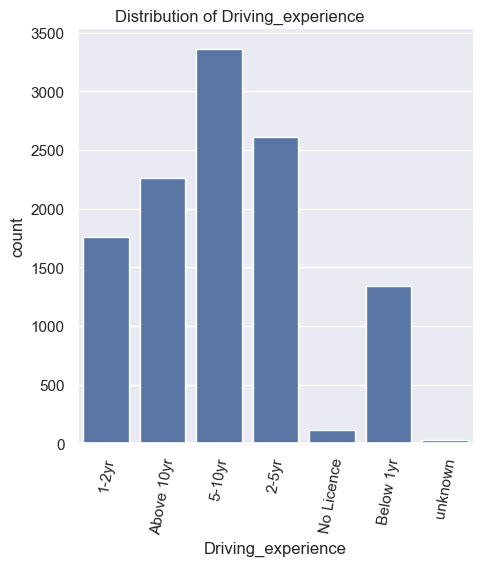

<Figure size 400x400 with 0 Axes>

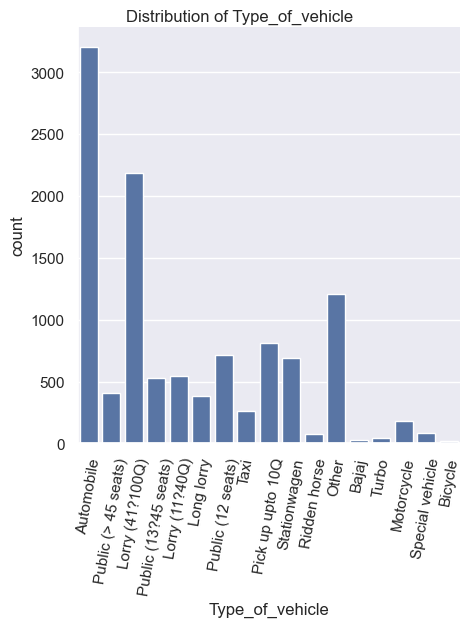

<Figure size 400x400 with 0 Axes>

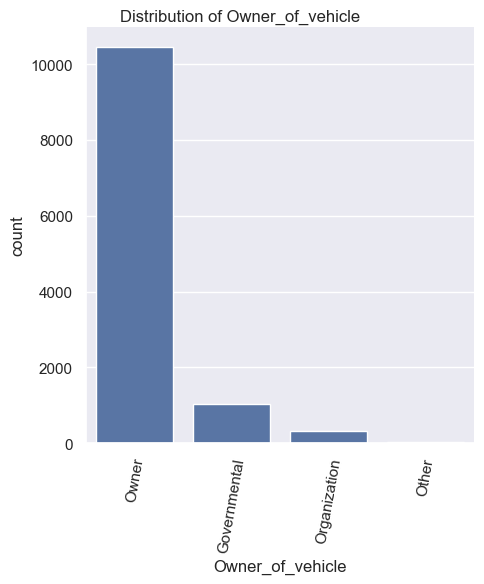

<Figure size 400x400 with 0 Axes>

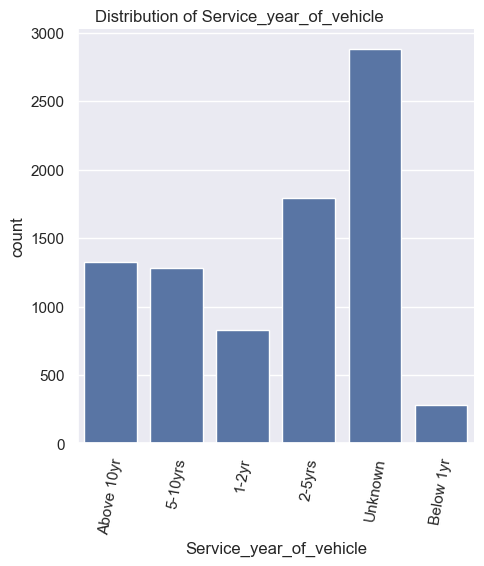

<Figure size 400x400 with 0 Axes>

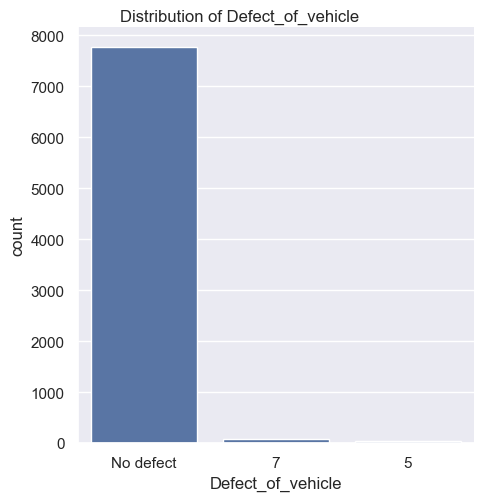

<Figure size 400x400 with 0 Axes>

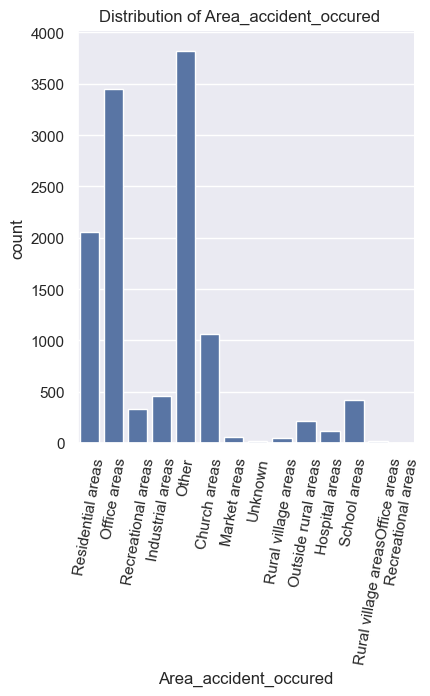

<Figure size 400x400 with 0 Axes>

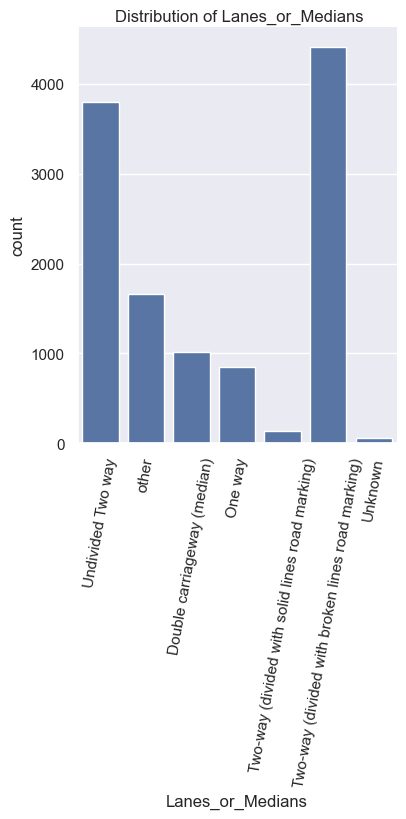

<Figure size 400x400 with 0 Axes>

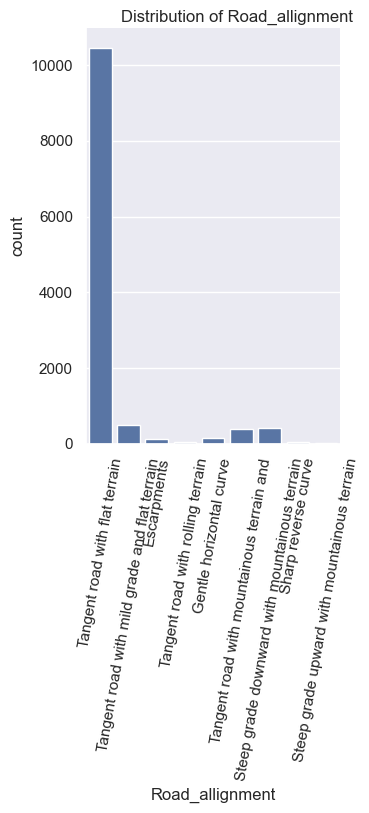

<Figure size 400x400 with 0 Axes>

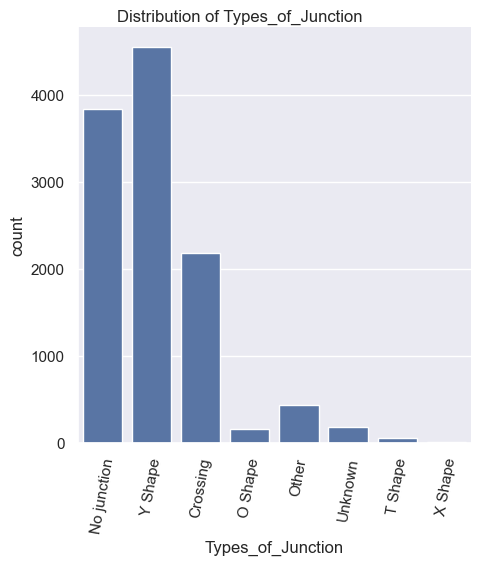

<Figure size 400x400 with 0 Axes>

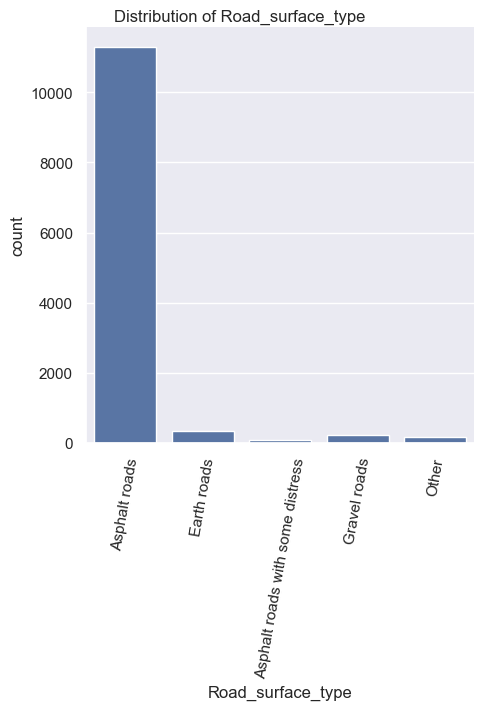

<Figure size 400x400 with 0 Axes>

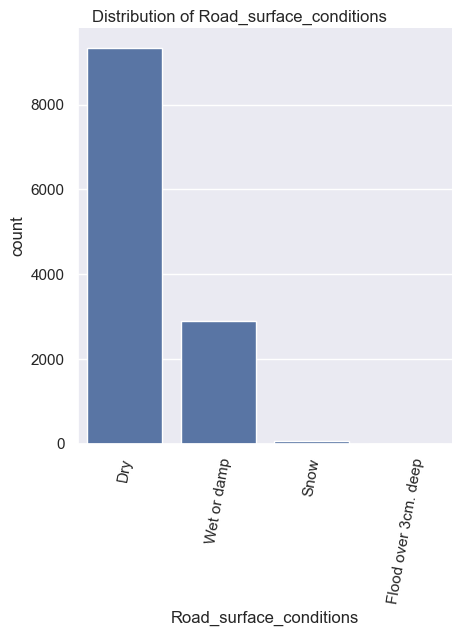

<Figure size 400x400 with 0 Axes>

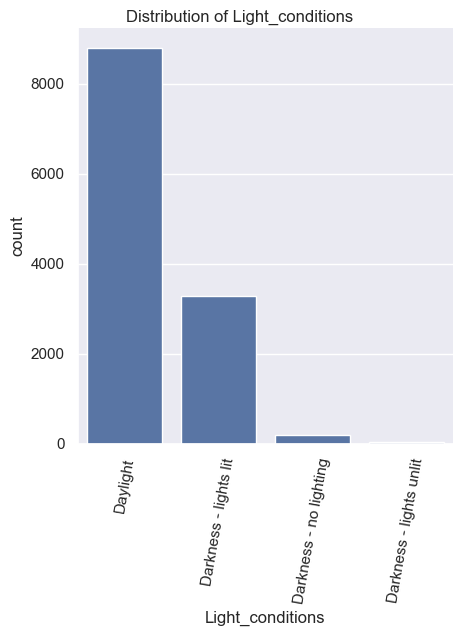

<Figure size 400x400 with 0 Axes>

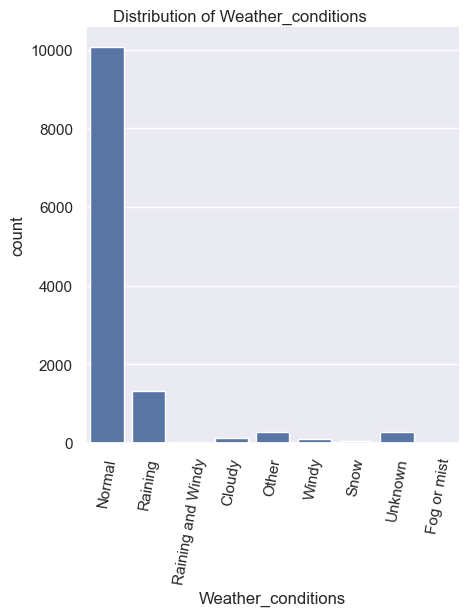

<Figure size 400x400 with 0 Axes>

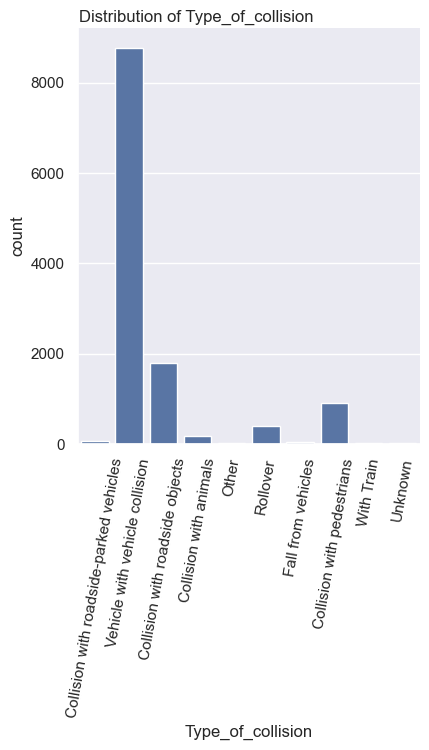

<Figure size 400x400 with 0 Axes>

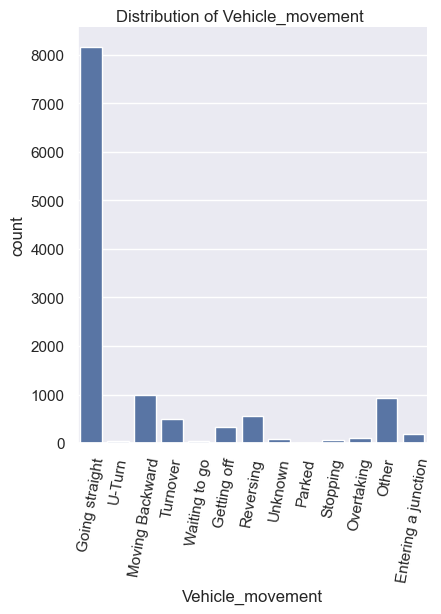

<Figure size 400x400 with 0 Axes>

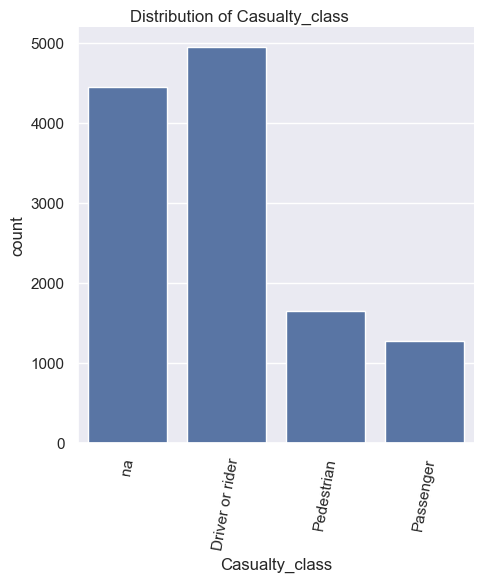

<Figure size 400x400 with 0 Axes>

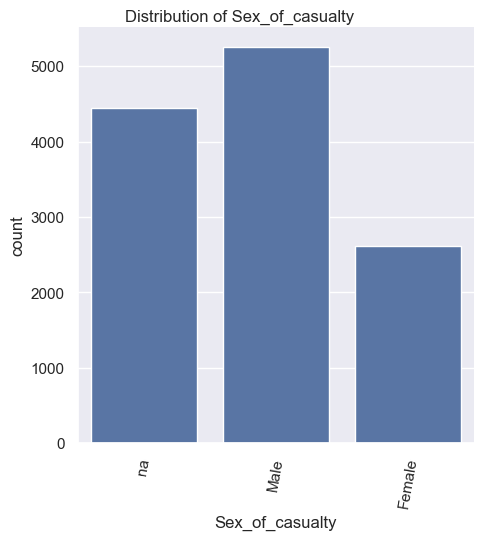

<Figure size 400x400 with 0 Axes>

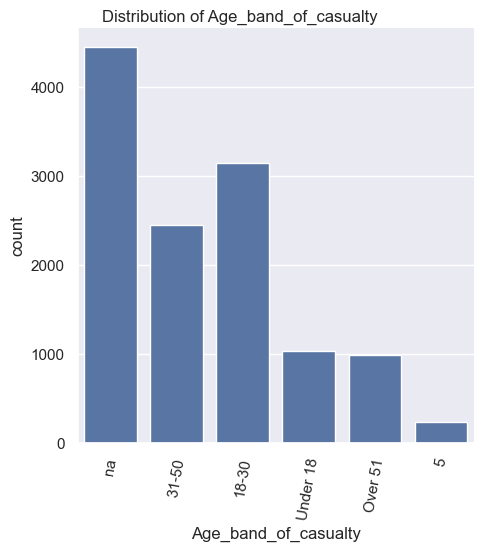

<Figure size 400x400 with 0 Axes>

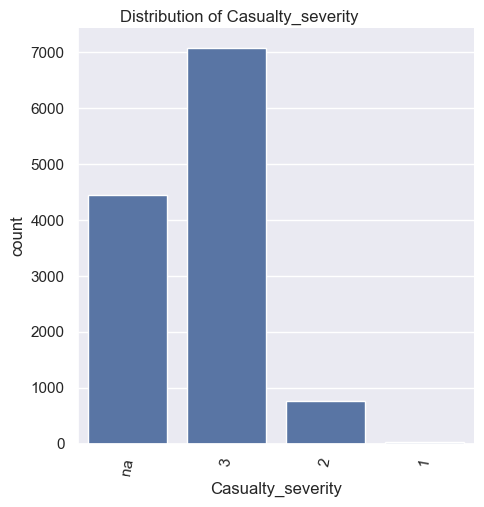

<Figure size 400x400 with 0 Axes>

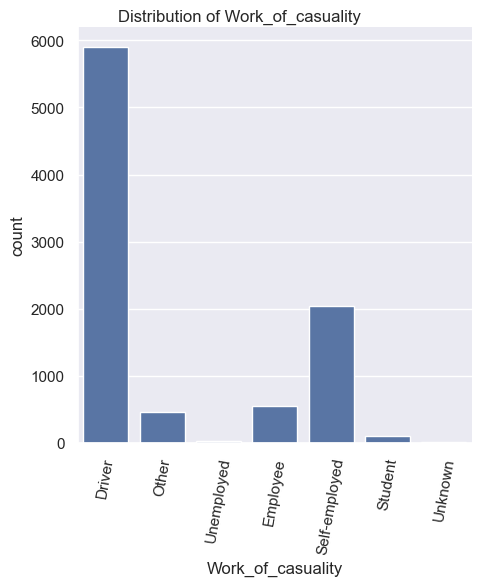

<Figure size 400x400 with 0 Axes>

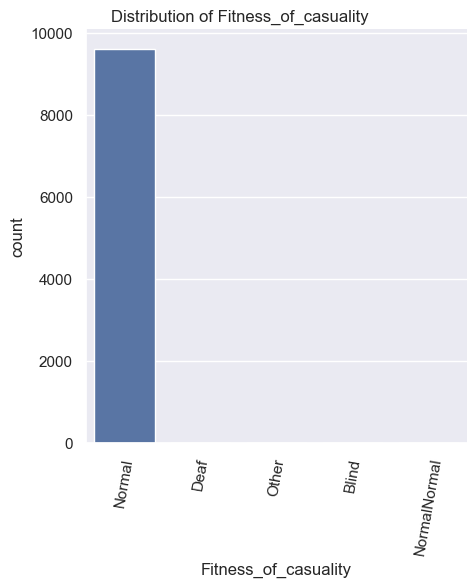

D:\Miniconda\envs\min_ds-env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x400 with 0 Axes>

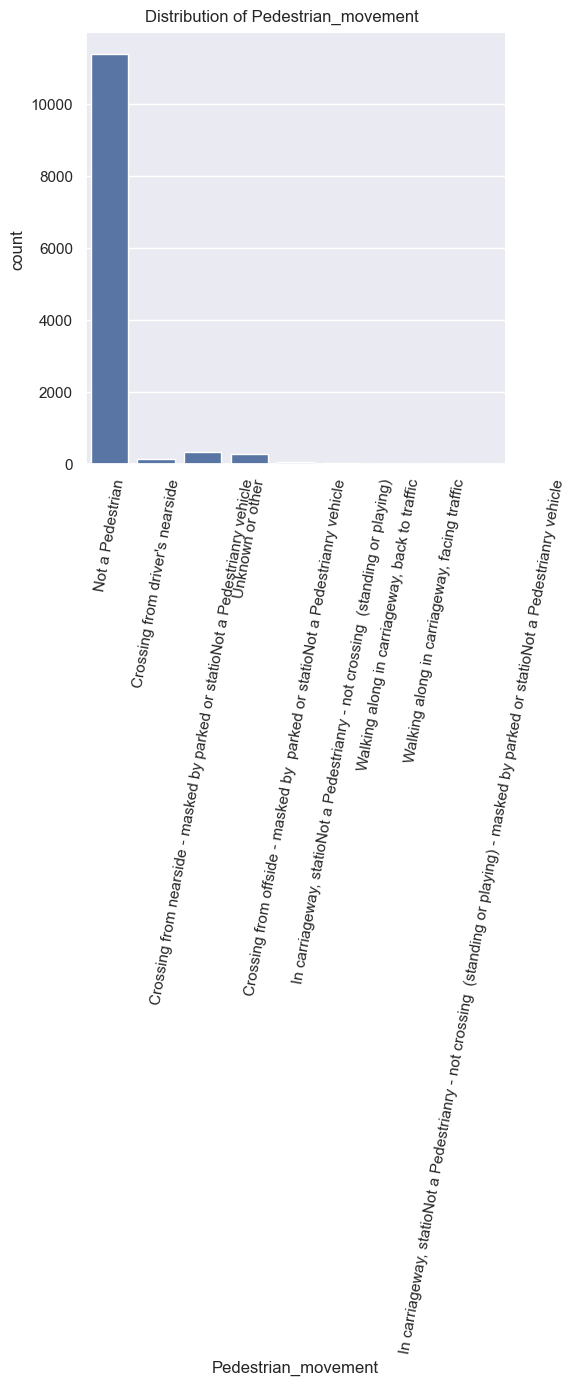

<Figure size 400x400 with 0 Axes>

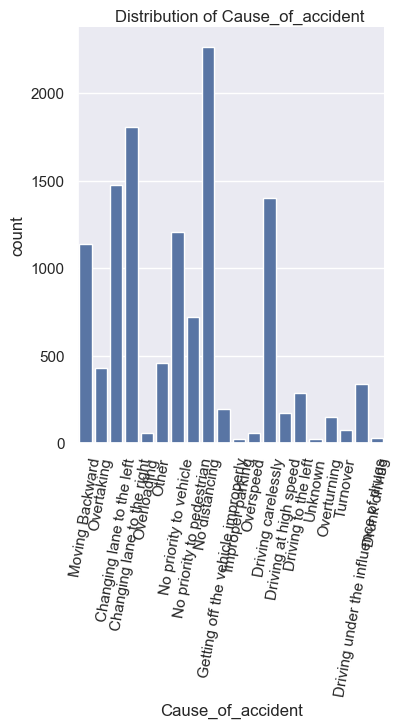

<Figure size 400x400 with 0 Axes>

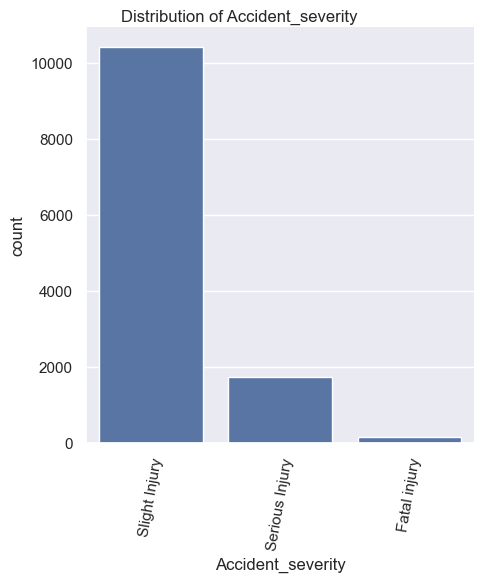

In [38]:
# Catplot to show distributions of features (except 'Time') across target classes
for feature in features_others:
    plt.figure(figsize = (4, 4))
    catplot = sns.catplot(data = data, x = feature, kind = 'count',sharey=False)
    if feature not in features_horiz:
        catplot.set_xticklabels(rotation = 80)
    plt.suptitle("Distribution of {} ".format(feature), y = 1, fontsize = 12)
    plt.show()
    

**_Percentage of missing values_**

We will calculate the percentage of missing values and perform the result on the graph to see the result easier.

<Axes: ylabel='col_name'>

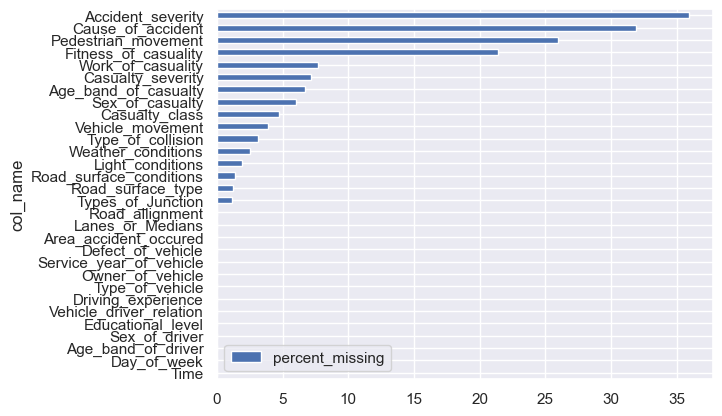

In [64]:
#Percentage of missing values
per_miss = data[categorical_cols].isnull().sum() * 100 / len(data[categorical_cols])
order = per_miss.sort_values()
missing_percent = pd.DataFrame({
    'col_name': categorical_cols,
    'percent_missing': order,
})
#Plot bar chart for easier observation
order = per_miss.sort_values()
missing_percent.plot(x="col_name", y="percent_missing", kind="barh") 


**- Number of columns with missing values:** 16 <br>
**- Columns with missing values:** Educational_level, Vehicle_driver_relation, Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type, Type_of_collision, Vehicle_movement, Work_of_casuality, Fitness_of_casuality

**_Number of unique values each catagorical columns_**

In [66]:
unique_value = pd.DataFrame({
    'number_unique': data[categorical_cols].nunique(),
})
unique_value


,number_unique
Time,1074
Day_of_week,7
Age_band_of_driver,5
Sex_of_driver,3
Educational_level,7
Vehicle_driver_relation,4
Driving_experience,7
Type_of_vehicle,17
Owner_of_vehicle,4
Service_year_of_vehicle,6


**_Unique value each catagorical columns_**

In [68]:
for categorical_cols in data:
    print(categorical_cols)
    print(data[categorical_cols].unique())

Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver
['Male' 'Female' 'Unknown']
Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle
['Owner' 'Governmental' nan 'Organization' 'Other']
Service_year_of_vehicle
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'B

As we can see, there is nothing seem to be unusual. We can say that the data is not abnormal

**Missing value imputation**

As we know that all features with missing values are categorical in nature. <br>
Fisrt, we combining similar values

In [70]:
# Combining similar values
def combine_similar(data):
    data = data.replace('Unknown', 'unknown')
    data = data.replace('Other', 'other')
    data = data.replace('Unknown or other', 'other')
    data = data.replace('Darkness - lights unlit', 'Darkness - no lighting')
    data['Age_band_of_casualty'] = data['Age_band_of_casualty'].replace('5', 'Under 18')
    return data

In [71]:
data = combine_similar(data)

We continue to convert unknown/other/na to nan

In [72]:
# Converting unknown/other/na to nan
def more_missing(data):
    data = data.replace('unknown', np.nan)
    data = data.replace('other', np.nan)
    data = data.replace('na', np.nan)
    return data

In [77]:
data = more_missing(data)

Then, we assign the missing values to the 'unknown' category

In [74]:
# Function to assign the missing values to the 'unknown' category
def unknown_imputer(data):
    data_unknown = data.copy(deep = True)
    data_unknown = data_unknown.replace(np.nan, 'unknown')
    return data_unknown

In [79]:
data = unknown_imputer(data)

With the goal of keeping the feature distributions not changing to much after imputation, we impute the missing values in a column in such a way so that the proportions of the existing unique values in the column remain roughly same as those were prior to the imputation.

In [75]:
def prop_imputer(data):
    data_prop = data.copy(deep = True)
    missing_cols = data_prop.isna().sum()[data_prop.isna().sum() != 0].index.tolist()
    for col in missing_cols:
        values_col = data_prop[col].value_counts(normalize = True).index.tolist()
        probabilities_col = data_prop[col].value_counts(normalize = True).values.tolist()
        data_prop[col] = data_prop[col].fillna(pd.Series(np.random.choice(values_col, p = probabilities_col, size = len(data))))
    return data_prop

In [80]:
data = prop_imputer(data)

Now, let's check again to see if there is still remain missing values

In [81]:
data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

There is no missing values left, we can move to the next part !

### **3. Asking meaningful questions** <br>


#### **Question: When did the accidents is more likely to happen ?**

**Benefits of finding the answer**

- The driver can avoid driving at that time or they will improve their awareness of driving more carefully. Furthermore the Traffic Police will have the solution to make sure the driver stricly follow the traffic regulations to ensure the safety of all road users during the rush hour.

To answer this question, we have to find the largest accident counts in column that related to time, we have 2 columns: `Time`, `Day_of_week` <br>
First, we visualize the countplot for the Day_of_week column to see which day of the week has the largest number of accident.

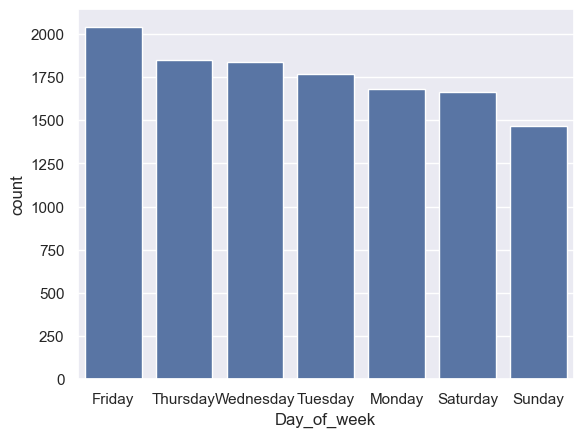

In [13]:
sns.countplot(x='Day_of_week', 
              data=data,order = data['Day_of_week'].value_counts().index)
plt.show()

From the graph, we can tell that most accident happened on week day, especially on Friday, Thursday and Wednessday, as we might expect that the accident is happened at the weekend. It can be explained that at the weekend, when everyone is getting a day-off, they would rather to stay at home than going to crowded destination. While on week day the street is more likely to be crowded by people who go to work or to leave from work.

Next, we will work on the `Time` column

After the convertion, the range of time is from 0 to 86400. We show the convertion for five specific, equispaced time points (the first and last of which are 24 hours apart, but coincides in the cyclic scale).


00 : 00 : 00 : 0 (12 AM) <br>
06 : 00 : 00 : 21600 (6 AM) <br>
12 : 00 : 00 : 43200 (12 PM)<br>
18 : 00 : 00 : 64800 (6 PM)<br>
24 : 00 : 00 : 86400 (12AM next day)

In the histogram, each bin denotes one-hour time interval, starting from 12  a.m. We convert the time labels back to the usual notation with a.m. and p.m. for better understanding of the distribution.

As we have 3 kinds of accident severity: Slight Injury, Fatal Injury, Serious Injury. We will see if there are any difference between time in each accident severity kind. 

In [5]:
data_slight = data[data['Accident_severity'] == 'Slight Injury']
data_serious = data[data['Accident_severity'] == 'Serious Injury']
data_fatal = data[data['Accident_severity'] == 'Fatal injury']

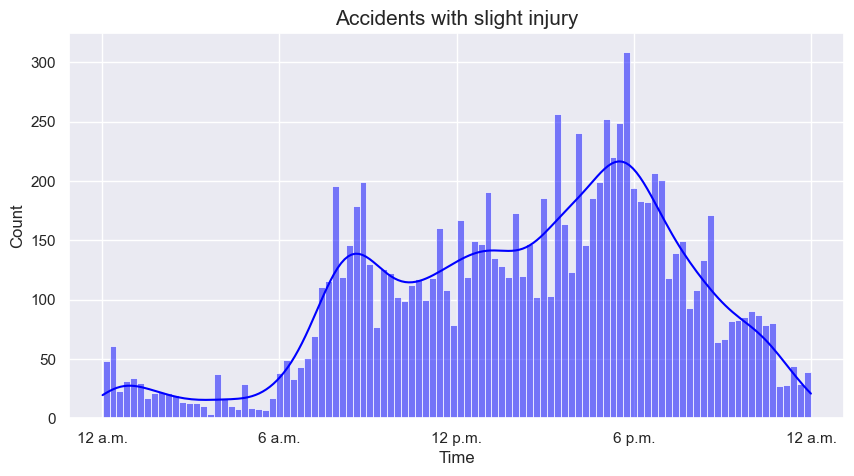

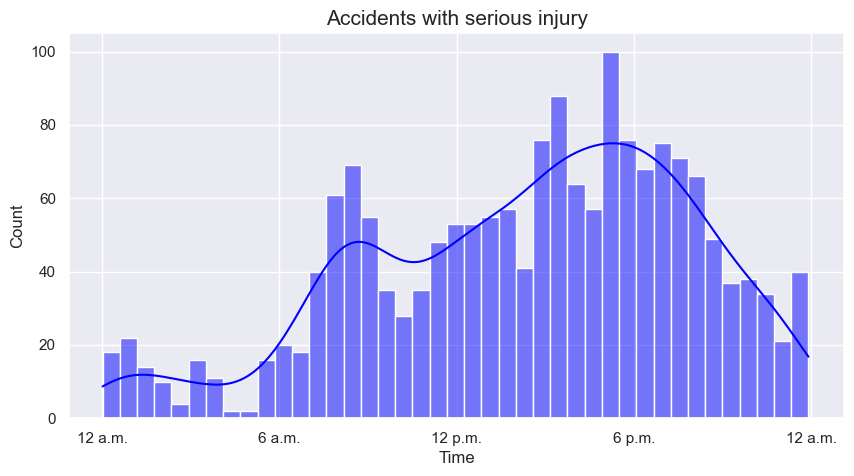

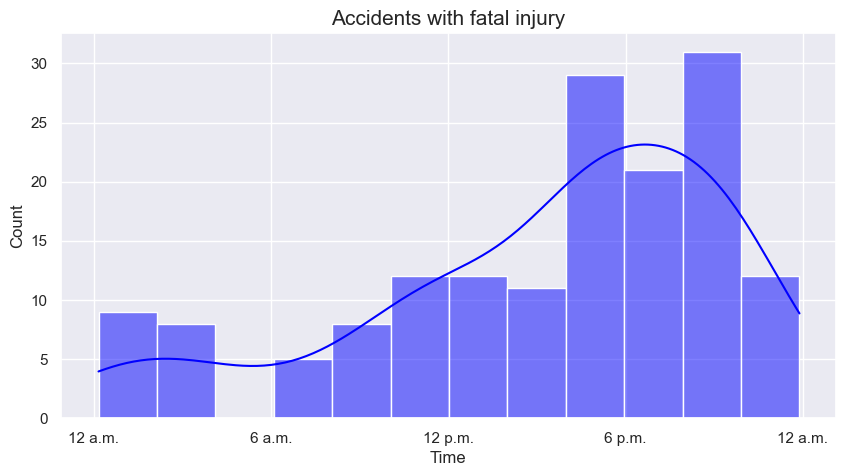

In [40]:
for df in [data_slight, data_serious, data_fatal]:
    plt.figure(figsize = (10, 5))
    nbin = int(np.sqrt(len(df)))
    hist = sns.histplot(df, x = 'Time', color = 'blue', kde = 'True', bins = nbin)
    if len(df) == len(data_slight):
        hist.set_title("Accidents with slight injury", fontsize = 15)
    elif len(df) == len(data_serious):
        hist.set_title("Accidents with serious injury", fontsize = 15)
    else:
        hist.set_title("Accidents with fatal injury", fontsize = 15)
    hist.set_xlim(-4000, 90400)
    hist.set_xticks(np.arange(0, 86500, 21600))
    hist.set_xticklabels(['12 a.m.', '6 a.m.', '12 p.m.', '6 p.m.', '12 a.m.'])
    plt.xlabel("Time")
    plt.show()
    print("")

The distribution reflects the intuition that there are more traffic accidents in the day time than at night. In particular, for accidents with slight or serious injuries, the distribution appears to have a bimodal structure with a distinct local mode apart from the global mode. It rises sharply from **5 a.m - 6 a.m** until it reaches the local peak at **8 a.m - 9 a.m**. After troughing slightly, it gradually rises to the global modal class **5 p.m - 6 p.m**. Then it falls sharply before stabilizing around **12 a.m - 1 a.m** and stays low until **5 a.m - 6 a.m**. For accidents with fatal injuries, however, the distribution appears to be slightly different from the former two cases, with a global peak in **8 p.m - 10 p.m** and a separate local peak in **4 p.m - 6 p.m**. We can tell that in every kind of accident severity, the most accident time range is around **6 p.m** especially with Fatal Injury the most accident reach highest count at **8 p.m - 10 p.m**

**Conclusion** <br>
We find out that most accident occured on weekday especially on Friday and the time range is around 6 p.m with most Fatal Injury is from 8 p.m - 10 p.m

#### **Question: Which of both genders is actually dangerous in Driving ?**

**Benefits of finding the answer**

- To find out if gender really consider as a matter when driving.
- Who are better drivers - men or women?
- Raising people’s awareness of obeying traffic laws no matter which their gender is.

We find out the answer by calculating the Conditional Probability; <br>
Probability of an Accident Happen When the Driver is a Female and Repeating the Calculations when it's Male.
P(Gender | Severity) 

Fisrt, let's countplot the `Sex_of_driver`column to see the number of each gender 

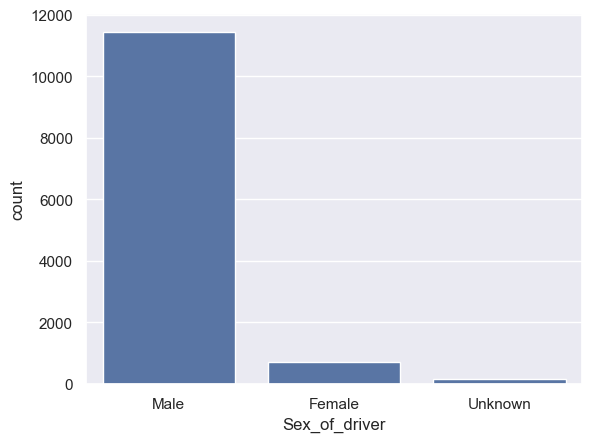

In [27]:
sns.countplot(x='Sex_of_driver', 
              data=data_df,order = data['Sex_of_driver'].value_counts().index)
plt.show()

As we can see on the graph, the number of Male driver is definitely biggest compare to Female driver and Unknown.

We find the percentage of accidents caused by each gender

In [39]:
data_df = data.copy(deep=True)
#Percentage of accidents caused by gender
((data_df.groupby(['Sex_of_driver']).size() / data_df["Sex_of_driver"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

Sex_of_driver
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

The percentage of accidents caused by Male driver is nearly 93% while the other 2 gender only 5.6% for Female and 1.44% for Unknown which can be easily understand because of the number of each gender  

Let's see if there are any difference cause of accident with each gender by using counplot 

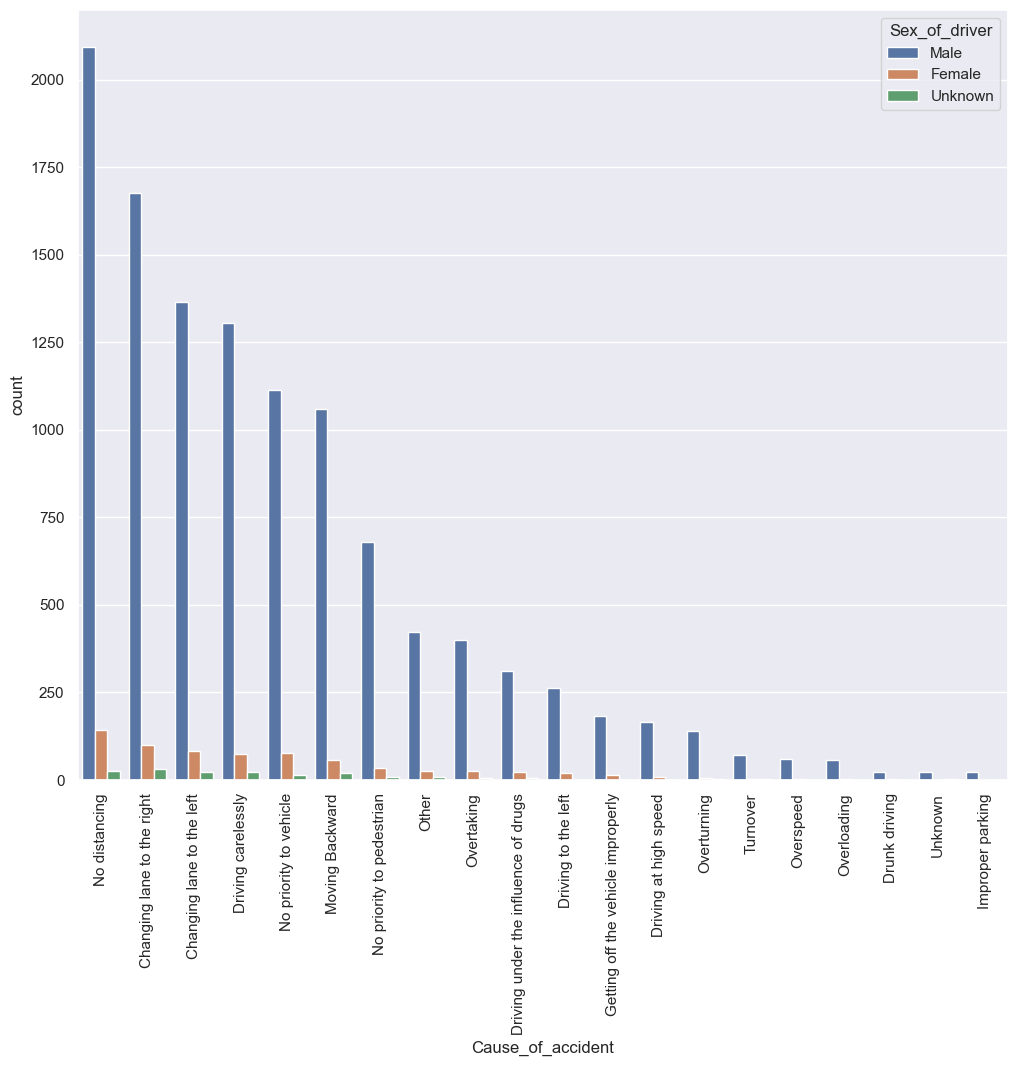

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(data_df, x="Cause_of_accident",hue="Sex_of_driver",order = data_df['Cause_of_accident'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

We can tell that any gender can cause accident with multiple reason, almost no exception. 

Now, let's see the accident servirity each gender by showing crosstab

In [25]:
ff = pd.crosstab(index=data_df['Sex_of_driver'].loc[data_df['Sex_of_driver'] !="Unknown"], columns=data_df['Accident_severity'],margins=True)
ff

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Sex_of_driver,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


After having the result of accident severity of each gender, we continue to calculate the probability of an accident happen when the Driver is a Male or Female <br>
P(Gender | Severity) 

In [26]:
# Calculate P((Gender = Female | Severity = Fatal)) and P((Gender = Male | Severity = Fatal))
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100) + '%\n')
# Calculate P((Gender = Female | Severity = Serious Injury)) and P((Gender = Male | Severity = Serious Injury))
print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100) + '%\n')
# Calculate P((Gender = Female | Severity = Slight Injury)) and P((Gender = Male | Severity = Slight Injury))
print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


**Conclusion** <br>
Although, the percentage of Accidents done in this sample by males is over 92% but, it doesn't actually indicate that males are more dangerous. If we calculated the probability for each gender we can deduce that both are quite the same which means traffic accident have no exception in any gender. 

### **4. Reflection** <br>

**What difficulties have you encountered?**

As this is a group of 2 people project, working alone in this project is really a challenge for me. I have to spend more time and when i want to know if there is any mistakes or if i want to get comment about my work i have to do this by myself which is really difficult.

**What have you learned?**

Beside all the knowledge that i gain when i working on this project and from the course, from the above difficulties, i learned that team is playing an important role while you working on a project especially on a group project.

If i had more time, i will spend more time on finding the other dataset that i had more interested in and i will definitely do better.

### **5. References** <br>


Dataset: 
- https://www.kaggle.com/saurabhshahane/road-traffic-accidents

EDA and Preprocessing data:
- https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
- https://www.kaggle.com/code/ajay1216/practical-guide-on-data-preprocessing-in-python

Visualization: 
- https://seaborn.pydata.org/tutorial.html
- https://www.w3schools.com/python/matplotlib_intro.asp
- https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/

Other:
- https://www.kaggle.com/code/devansodariya/uk-road-safety-accident-analysis
